# [0] 데이터셋
- city_index -> 수원시 도시정책지표 공개 데이터
- survey_2023 ->(HRC250611) 2023년 수원서베이 용역_공개용 데이터(엑셀)
- survey_2024 -> (HRC250604) 2024년 수원서베이 용역_공개용 데이터(엑셀)
- pannel_2024_q3 -> (공개용) 2024년 3분기 패널조사 데이터(가중치)
- pannel_2024_q4 -> (공개용) 2024년 4분기 패널조사 데이터(가중치)
- pannel_2025_q1 -> (공개용) 2025년 1분기 패널조사_데이터(가중치)
- pannel_2025_q2 -> (공개용)2025년 2분기 패널조사_데이터(가중치)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 59.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from datetime import datetime, timedelta
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta

In [4]:
os.chdir('/content/drive/MyDrive/새싹캠퍼스/PJ5_SUWON/DATA')
listdir = os.listdir()
listdir

['city_index.xlsx',
 'survey_2023.xlsx',
 'survey_2024.xlsx',
 'pannel_2025_q2.xlsx',
 'pannel_2025_q1.xlsx',
 'pannel_2024_q4.xlsx',
 'pannel_2024_q3.xlsx',
 'gg_emission.xlsx',
 'renewable_suwon.xlsx',
 'renewable_year.xlsx']

In [5]:
xlsx_files = [f for f in listdir if f.endswith('.xlsx')]

for file in xlsx_files:
    var_name = file.replace('.xlsx', '')
    globals()[var_name] = pd.read_excel(file)

In [6]:
# 서베이데이터 0행을 컬럼명으로
survey_2024.columns = survey_2024.iloc[0]
survey_2024 = survey_2024[1:]
survey_2024 = survey_2024.reset_index(drop=True)

survey_2023.columns = survey_2023.iloc[0]
survey_2023 = survey_2023[1:]
survey_2023 = survey_2023.reset_index(drop=True)

# [1] 수원 에너지, 탄소배출 현황

## 1. 수원시 온실가스 배출량
- gg_emission.xlsx
- 직접배출량 : 에너지, 산업공정 및 제품생산, 농업, LULUCF, 폐기물
- 간접배출량 : 전력, 열, 폐기물

In [7]:
gg_emission

,구분,2016,2017,2018,2019,2020
0,에너지,3196.474867,3211.802745,3050.212851,3102.386734,2926.868264
1,산업공정 및 제품 생산,65.306476,52.151976,58.913451,56.072055,44.645819
2,농업,8.938584,7.751119,7.692578,6.485952,6.202057
3,LULUCF,-2.266746,-0.914772,-2.675155,-2.954576,-2.493110
4,전력,2589.519072,2717.247179,2824.920027,2628.929982,2379.250668
5,열,679.377006,643.946336,707.707249,548.731449,654.922609
6,폐기물,165.439301,165.026096,222.061216,169.260881,127.536232


In [8]:
# 1) 연도 컬럼 식별
year_cols = [c for c in gg_emission.columns if str(c).isdigit()]

# 2) 총배출량 계산 (LULUCF 제외)
is_lulucf = gg_emission['구분'].str.contains("LULUCF", case=False, na=False)
gross = gg_emission.loc[~is_lulucf, year_cols].sum(axis=0)

In [9]:
# 수원블루 색상
suwon_blue = "#1C3879"
orange = "#FF8A00"

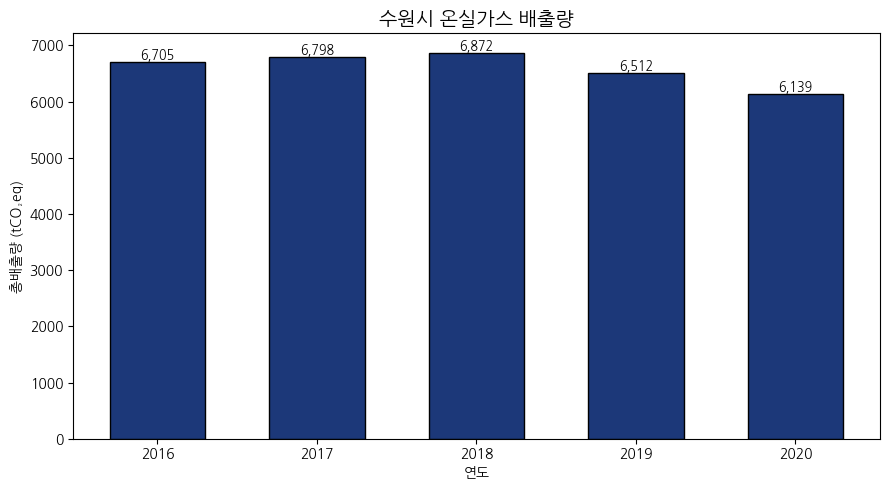

In [10]:
# 3) 시각화
x = np.arange(len(year_cols))
plt.figure(figsize=(9,5))

plt.bar(x, gross.values, width=0.6, color=suwon_blue, edgecolor="black")

for i, v in enumerate(gross.values):
    plt.text(i, v, f"{v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.xticks(x, year_cols)
plt.title("수원시 온실가스 배출량", fontsize=14)
plt.xlabel("연도")
plt.ylabel("총배출량 (tCO₂eq)")
plt.tight_layout()
plt.show();

## 2. 수원시 신재생에너지 현황
- 태양광밖에 없어?

In [11]:
re = renewable_suwon
re

,년도,시군명,발전원구분명,발전원개수,발전용량(kW)
0,2023,수원시,태양광,106,6616.97
1,2022,수원시,태양광,102,7683.86
2,2021,수원시,태양광,99,7597.75
3,2020,수원시,태양광,80,5653.85
4,2019,수원시,태양광,65,3988.85
5,2018,수원시,태양광,53,3058.85
6,2017,수원시,태양광,45,2893.97
7,2016,수원시,태양광,34,1744.65
8,2015,수원시,태양광,29,1347.65
9,2014,수원시,태양광,18,707.55


In [12]:
data = re[["년도", "발전원개수", "발전용량(kW)"]].sort_values("년도")

years = data["년도"].astype(int)
count = data["발전원개수"]
capacity = data["발전용량(kW)"]

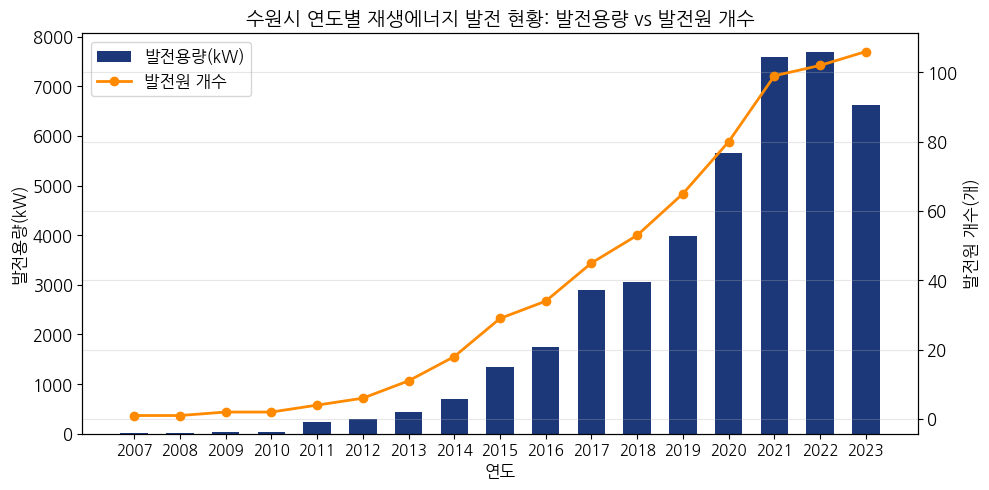

In [13]:
# 시각화
x = np.arange(len(years))

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.bar(x, capacity, color=suwon_blue, width=0.6, label="발전용량(kW)")
ax1.set_ylabel("발전용량(kW)", fontsize=12)
ax1.set_xlabel("연도", fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(years, fontsize=11)

ax2 = ax1.twinx()
ax2.plot(x, count, color=orange, marker="o", linewidth=2, label="발전원 개수")
ax2.set_ylabel("발전원 개수(개)", fontsize=12)

ax1.set_title("수원시 연도별 재생에너지 발전 현황: 발전용량 vs 발전원 개수", fontsize=14)

ax1.tick_params(axis="y", labelsize=12)
ax2.tick_params(axis="y", labelsize=12)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc="upper left", fontsize=12)

plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show();

## 3. 수원시 연도별 신재생에너지 추이

In [14]:
renewable_year

,신재생에너지별(1),2016,2017,2018,2019,2020,2021,2022,2023
0,태양열 (toe),0,0.00,0,0,0,0.00,94.69,78
1,태양광 (MWh),180,474.88,1105,1245,1202,4483.23,22882.00,9177
2,지열에너지 (toe),985,0.00,0,0,0,0.00,2709.00,3988
3,바이오에너지,0,0.00,0,0,0,0.00,43.44,15463
4,폐기물에너지,0,0.00,0,0,0,0.00,5781.00,12992
5,신재생에너지,0,0.00,0,0,0,0.00,134.62,348


In [15]:
renewable_year.dtypes

,0
신재생에너지별(1),object
2016,int64
2017,float64
2018,int64
2019,int64
2020,int64
2021,float64
2022,float64
2023,int64


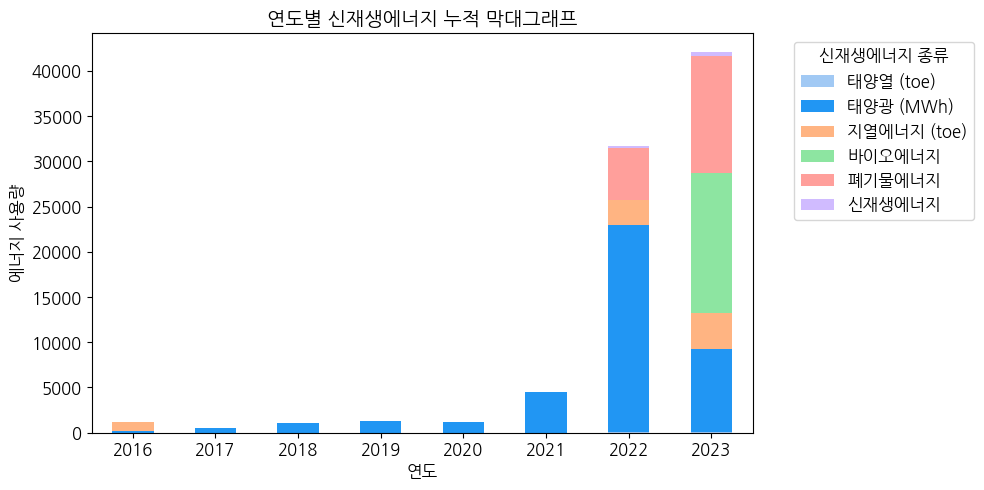

In [16]:
# 시각화
re_year = renewable_year.set_index('신재생에너지별(1)')

re_year = re_year.T
energy_sources = re_year.columns

colors = []
for source in energy_sources:
    if "태양광" in source:
        colors.append("#2196F3")
    else:
        colors.append(None)

palette = sns.color_palette("pastel", len([c for c in colors if c is None]))
palette_idx = 0
for i in range(len(colors)):
    if colors[i] is None:
        colors[i] = palette[palette_idx]
        palette_idx += 1

ax = re_year.plot(kind='bar', stacked=True, figsize=(10, 5), color=colors)

plt.title('연도별 신재생에너지 누적 막대그래프', fontsize=14)
plt.xlabel('연도', fontsize=12)
plt.ylabel('에너지 사용량', fontsize=12)

plt.legend(title='신재생에너지 종류', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show();

# [2] 2023, 2024 서베이

In [17]:
survey_2023.dtypes
survey_2024.dtypes

,0
0,
PID,object
totgagu1s,object
birth1,object
birth2,object
birth3,object
...,...
DM12,object
DM13,object
ADD1,object


,0
0,
PID,object
H0a1,object
H0a2,object
H0a3,object
gender,object
...,...
MHQ1,object
MHQ2,object
MHQ4,object


## 1) 환경문제 심각도 인식수준 비교
- 2023년(Q22)
- 2024년(Q33)

In [18]:
mapping_2023 = {
    "Q22a1": "쓰레기/폐기물",
    "Q22a2": "기후변화/이상기온",
    "Q22a3": "대기오염/미세먼지",
    "Q22a4": "녹지/생물다양성 파괴",
    "Q22a5": "하천/호수 수질 오염",
    "Q22a6": "소음/진동",
}
mapping_2024 = {
    "Q33a1": "쓰레기/폐기물",
    "Q33a2": "기후변화/이상기온",
    "Q33a3": "대기오염/미세먼지",
    "Q33a4": "녹지/생물다양성 파괴",
    "Q33a5": "하천/호수 수질 오염",
    "Q33a6": "소음/진동",
}

categories = [
    "쓰레기/폐기물",
    "기후변화/이상기온",
    "대기오염/미세먼지",
    "녹지/생물다양성 파괴",
    "하천/호수 수질 오염",
    "소음/진동",
]

In [19]:
# (1~3=not_severe, 4=neutral, 5~7=severe) → % (분모=전체 유효응답)
def summarize_three_bins(df: pd.DataFrame, col_map: dict, label: str) -> pd.DataFrame:
    rows = []
    for col, cat in col_map.items():
        if col not in df.columns:
            continue
        s = pd.to_numeric(df[col], errors="coerce")
        s = s[(s >= 1) & (s <= 7)]
        n_total = s.notna().sum()

        n_not = ((s >= 1) & (s <= 3)).sum()
        n_neu = (s == 4).sum()
        n_sev = ((s >= 5) & (s <= 7)).sum()

        if n_total == 0:
            p_not = p_neu = p_sev = np.nan
        else:
            p_not = n_not / n_total * 100
            p_neu = n_neu / n_total * 100
            p_sev = n_sev / n_total * 100

        rows.append({
            "category": cat, "year": label,
            "not_severe": p_not, "neutral": p_neu, "severe": p_sev
        })
    return pd.DataFrame(rows)


In [20]:
sum23 = summarize_three_bins(survey_2023, mapping_2023, "2023")
sum24 = summarize_three_bins(survey_2024, mapping_2024, "2024")
summary = (pd.concat([sum23, sum24], ignore_index=True)
             .set_index(["category", "year"])
             .reindex(pd.MultiIndex.from_product([categories, ["2023", "2024"]]))
             .reset_index()
             .rename(columns={"level_0": "category", "level_1": "year"}))

In [21]:
summary

,category,year,not_severe,neutral,severe
0,쓰레기/폐기물,2023,11.562959,16.021558,72.415483
1,쓰레기/폐기물,2024,20.379457,19.398103,60.222440
2,기후변화/이상기온,2023,18.618324,21.901029,59.480647
3,기후변화/이상기온,2024,15.603533,16.454040,67.942427
4,대기오염/미세먼지,2023,24.350808,22.586967,53.062224
5,대기오염/미세먼지,2024,16.584887,17.926071,65.489042
6,녹지/생물다양성 파괴,2023,9.407153,24.399804,66.193043
7,녹지/생물다양성 파괴,2024,19.659797,24.664704,55.675499
8,하천/호수 수질 오염,2023,9.456149,25.232729,65.311122
9,하천/호수 수질 오염,2024,20.673863,24.403009,54.923127


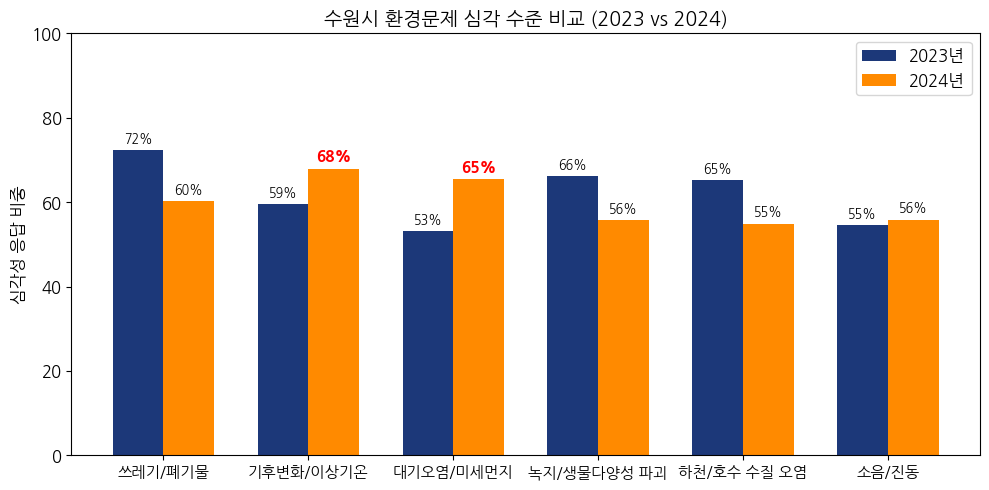

In [22]:
d23 = summary[summary["year"] == "2023"]
d24 = summary[summary["year"] == "2024"]

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(x - width/2, d23["severe"].values, width, color=suwon_blue, label="2023년")
ax.bar(x + width/2, d24["severe"].values, width, color=orange, label="2024년")

ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=11)
ax.set_ylabel("심각성 응답 비중", fontsize=12)
ax.set_ylim(0, 100)
ax.set_title("수원시 환경문제 심각 수준 비교 (2023 vs 2024)", fontsize=14)
ax.tick_params(axis='y', labelsize=12)

for i, v in enumerate(d23["severe"].values):
    ax.text(i - width/2, v + 1, f"{v:.0f}%", ha='center', va='bottom', fontsize=9)

top2_idx = d24["severe"].values.argsort()[-2:]

for i, v in enumerate(d24["severe"].values):
    if i in top2_idx:
        ax.text(i + width/2, v + 1, f"{v:.0f}%", ha='center', va='bottom',
                fontsize=11, fontweight='bold', color='red')
    else:
        ax.text(i + width/2, v + 1, f"{v:.0f}%", ha='center', va='bottom', fontsize=9)

ax.legend(fontsize=12)

plt.tight_layout()
plt.show();

## 2) 환경보전을 위해 다음의 행동을 얼마나 실천하는가
- 2023(Q23)
- 2024(Q36)

In [23]:
map_2023 = {
    "자원순환": ["Q23a1", "Q23a2", "Q23a3"],
    "수송"    : ["Q23b1", "Q23b2", "Q23b3"],
    "소비"    : ["Q23c1", "Q23c2", "Q23c3"],
    "에너지"  : ["Q23d1", "Q23d2", "Q23d3"],
}

map_2024 = {
    "자원순환": ["Q36_1a1", "Q36_1a2", "Q36_1a3", "Q36_1a4"],
    "수송"    : ["Q36_2a1", "Q36_2a2", "Q36_2a3"],
    "소비"    : ["Q36_3a1", "Q36_3a2", "Q36_3a3"],
    "에너지"  : ["Q36_4a1", "Q36_4a2", "Q36_4a3", "Q36_4a4"],
}


In [24]:
def compute_5to7_share(df, mapping, year_label):
    rows = []
    for domain, cols in mapping.items():
        cols_use = [c for c in cols if c in df.columns]
        if not cols_use:
            rows.append({"영역": domain, "연도": year_label, "적극실천_비율(5~7%)": float('nan')})
            continue

        mask = df[cols_use].apply(lambda s: s.between(5, 7))
        pct  = mask.to_numpy().mean() * 100
        rows.append({"영역": domain, "연도": year_label, "적극실천_비율(5~7%)": pct})
    return pd.DataFrame(rows)

In [25]:
res23 = compute_5to7_share(survey_2023, map_2023, "2023")
res24 = compute_5to7_share(survey_2024, map_2024, "2024")

result = pd.concat([res23, res24], ignore_index=True)

agg = (result
       .groupby(["영역", "연도"], as_index=False)["적극실천_비율(5~7%)"]
       .mean())

result_pivot = (agg
                .pivot(index="영역", columns="연도", values="적극실천_비율(5~7%)")
                .reindex(["자원순환","수송","소비","에너지"]))

print(result_pivot)

연도         2023       2024
영역                        
자원순환  72.480810  71.368989
수송    61.162829  48.260822
소비    67.728238  64.093338
에너지   71.990854  69.267255


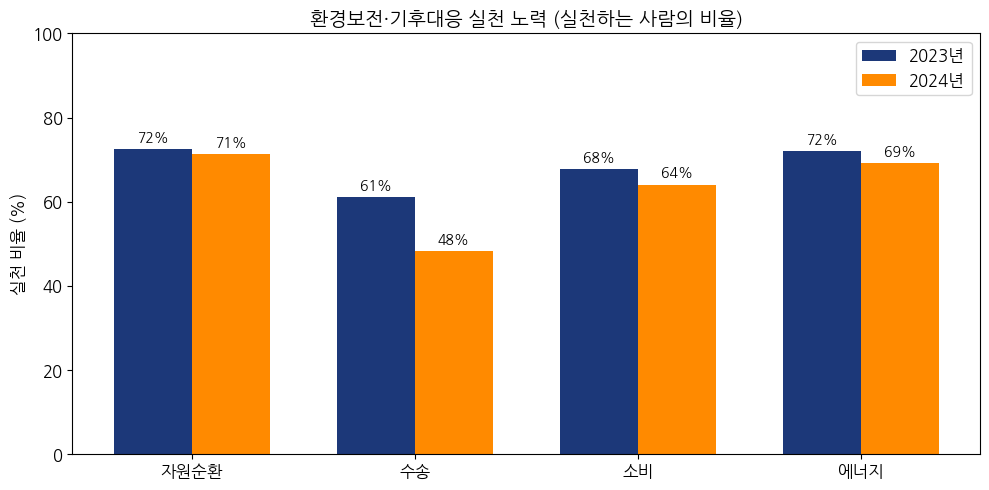

In [26]:
# 시각화
domains = result_pivot.index.tolist()
x = np.arange(len(domains))
width = 0.35

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x - width/2, result_pivot["2023"].values, width, label="2023년", color=suwon_blue)
ax.bar(x + width/2, result_pivot["2024"].values, width, label="2024년", color=orange)


ax.set_xticks(x)
ax.set_xticklabels(domains, fontsize=12)
ax.set_ylim(0, 100)
ax.set_ylabel("실천 비율 (%)", fontsize=12)
ax.set_title("환경보전·기후대응 실천 노력 (실천하는 사람의 비율)", fontsize=14)
ax.tick_params(axis='y', labelsize=12)

for i, v in enumerate(result_pivot["2023"].values):
    if pd.notnull(v):
        ax.text(i - width/2, v + 1, f"{v:.0f}%", ha='center', va='bottom', fontsize=10)
for i, v in enumerate(result_pivot["2024"].values):
    if pd.notnull(v):
        ax.text(i + width/2, v + 1, f"{v:.0f}%", ha='center', va='bottom', fontsize=10)

ax.legend(fontsize=12)

plt.tight_layout()
plt.show();

## 3) 2023_환경보호를 위한 효과적 방법(Q24)
- 1 = 전혀 효과적이지 않다 / 4 = 보통 / 7 = 매우 효과적이다
- 5, 6, 7번이라고 답한 사람의 비중

In [27]:
Q24 = ["Q24a1","Q24a2","Q24a3","Q24a4","Q24a5"]
Q24_labels = {
    "Q24a1": "자발적 노력",
    "Q24a2": "규제 및 단속",
    "Q24a3": "인센티브 제공",
    "Q24a4": "인증/마크 제도",
    "Q24a5": "정보·교육 제공"
}

In [28]:
results = []

for col in Q24:
    total = survey_2023[col].notna().sum()
    high = (survey_2023[col].isin([5,6,7])).sum()
    ratio = (high / total * 100) if total > 0 else 0
    results.append({"항목": Q24_labels[col], "효과적 비율(5~7)": ratio})

result_df = pd.DataFrame(results)

/tmp/ipython-input-2024899786.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)  # 범례 쓸 경우


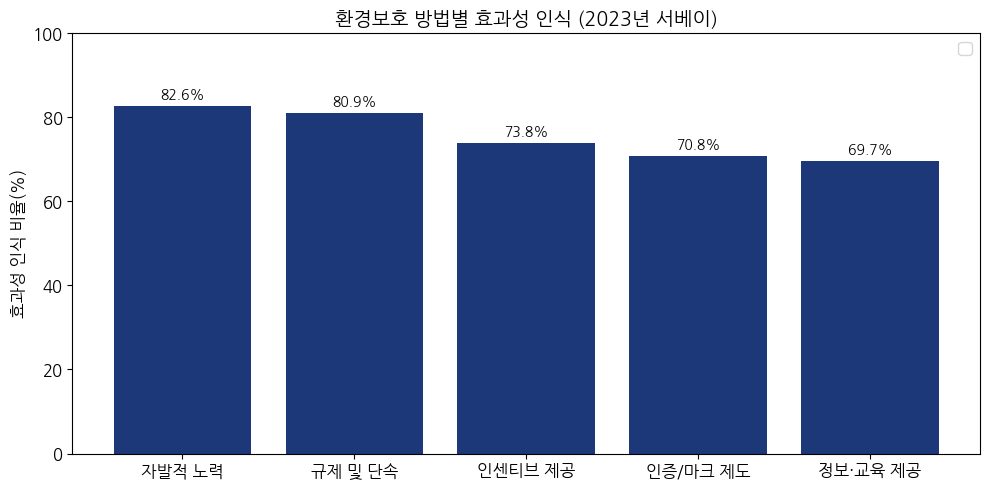

In [29]:
# 시각화
plt.figure(figsize=(10, 5))
plt.bar(result_df["항목"], result_df["효과적 비율(5~7)"], color=suwon_blue)

plt.title("환경보호 방법별 효과성 인식 (2023년 서베이)", fontsize=14)
plt.xlabel("")
plt.ylabel("효과성 인식 비율(%)", fontsize=12)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for i, v in enumerate(result_df["효과적 비율(5~7)"]):
    plt.text(i, v + 1, f"{v:.1f}%", ha="center", va="bottom", fontsize=10)

plt.ylim(0, 100)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show();

## 4) 수원의 바람직한 미래상
- 2023(Q49)
- 2024(Q59)

- (1=전혀 중요하지 않다 / 4=보통 / 7=매우 중요하다) => 1,2,3 = 중요하지 않다 / 4=보통 / 5,6,7=중요하다로 구분하여




































































































































































































































 분석

In [30]:
labels = {
    1: "활력 있는 경제도시",
    2: "품격 있는 교육도시",
    3: "융성하는 문화도시",
    4: "따뜻한 복지도시",
    5: "건강한 보건도시",
    6: "안전제일 도시",
    7: "쾌적한 환경도시",
    8: "탄소중립 도시",
    9: "첨단 스마트도시",
    10: "편리한 교통도시",
    11: "역동적인 스포츠도시",
    12: "경기도 수부도시",
}
cols_2023 = [f"Q49a{i}" for i in range(1, 13)]
cols_2024 = [f"Q59a{i}" for i in range(1, 13)]

In [31]:
def summarize_importance(df: pd.DataFrame, cols: list, year: int) -> pd.DataFrame:
    rows = []
    for i, col in enumerate(cols, start=1):
        if col not in df.columns:
            rows.append({"항목코드": i, "항목": labels[i], "연도": year,
                         "중요(5~7) 비율(%)": np.nan, "보통(4) 비율(%)": np.nan,
                         "중요하지않음(1~3) 비율(%)": np.nan, "유효응답수": 0})
            continue
        s = pd.to_numeric(df[col], errors="coerce")
        s = s[s.between(1, 7)]
        n = s.size
        if n == 0:
            rows.append({"항목코드": i, "항목": labels[i], "연도": year,
                         "중요(5~7) 비율(%)": np.nan, "보통(4) 비율(%)": np.nan,
                         "중요하지않음(1~3) 비율(%)": np.nan, "유효응답수": 0})
            continue
        rows.append({
            "항목코드": i,
            "항목": labels[i],
            "연도": year,
            "중요(5~7) 비율(%)": round((s >= 5).mean() * 100, 1),
            "보통(4) 비율(%)": round((s == 4).mean() * 100, 1),
            "중요하지않음(1~3) 비율(%)": round((s <= 3).mean() * 100, 1),
            "유효응답수": int(n),
        })
    return pd.DataFrame(rows)

res23 = summarize_importance(survey_2023, cols_2023, 2023)
res24 = summarize_importance(survey_2024, cols_2024, 2024)

result = (pd.concat([res23, res24], ignore_index=True)
            .sort_values(["항목코드", "연도"])
            .reset_index(drop=True))

result_pivot = result.pivot(index="항목", columns="연도", values="중요(5~7) 비율(%)")
result_pivot = result_pivot.loc[list(labels.values())]

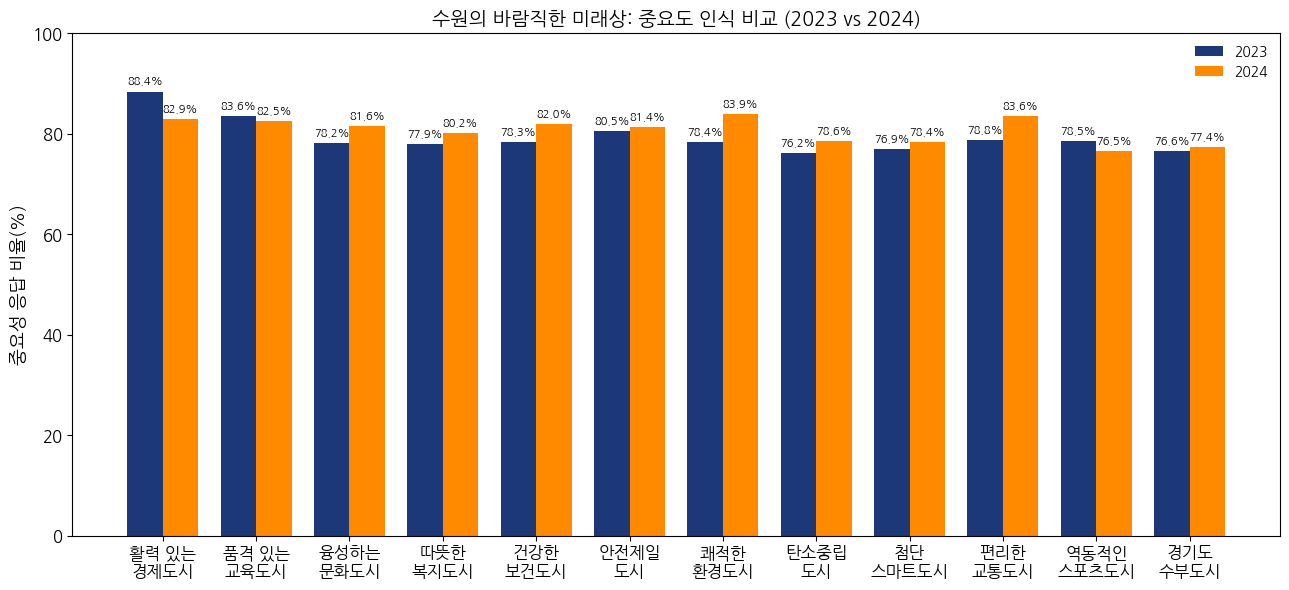

In [32]:
# 시각화
x = np.arange(len(result_pivot.index))
width = 0.38
def two_line_label(label):
    parts = label.split()
    if len(parts) > 1:
        return " ".join(parts[:-1]) + "\n" + parts[-1]
    else:
        return label

labels = [two_line_label(label) for label in result_pivot.index]

plt.figure(figsize=(13, 6))
plt.bar(x - width/2, result_pivot[2023], width, label="2023", color=suwon_blue)
plt.bar(x + width/2, result_pivot[2024], width, label="2024", color=orange)

for i, v in enumerate(result_pivot[2023]):
    if pd.notna(v):
        plt.text(i - width/2, v + 1, f"{v:.1f}%", ha="center", va="bottom", fontsize=8)
for i, v in enumerate(result_pivot[2024]):
    if pd.notna(v):
        plt.text(i + width/2, v + 1, f"{v:.1f}%", ha="center", va="bottom", fontsize=8)

plt.xticks(x, labels, ha="center", fontsize=12)
plt.yticks(fontsize=12)

plt.ylim(0, 100)
plt.ylabel("중요성 응답 비율(%)", fontsize=13)
plt.title("수원의 바람직한 미래상: 중요도 인식 비교 (2023 vs 2024)", fontsize=14)
plt.legend(frameon=False)
plt.tight_layout()
plt.show();

# [3] 외부데이터 스타일통일

## 1) 수원시의 문제점

In [33]:
data = {
    "항목": ["수원비행장 이전 지연", "지역간 불균형", "편의시설(교육, 문화, 복지시설 등) 부족",
           "대기, 수질, 소음 등 환경문제", "대중교통 불편", "첨단산업, R&D시설 등 자족시설 확충 필요", "기타"],
    "비율": [20.2, 17.2, 16.6, 15.1, 14.6, 14.0, 2.2]
}

df = pd.DataFrame(data)

In [ ]:
labels = [
    "수원비행장\n이전지연",
    "지역간\n불균형",
    "편의시설\n부족",
    "대기, 수질, 소음 등\n환경문제",
    "대중교통\n불편",
    "자족시설 확충 필요\n(첨단산업, R&D시설 등)",
    "기타"
]

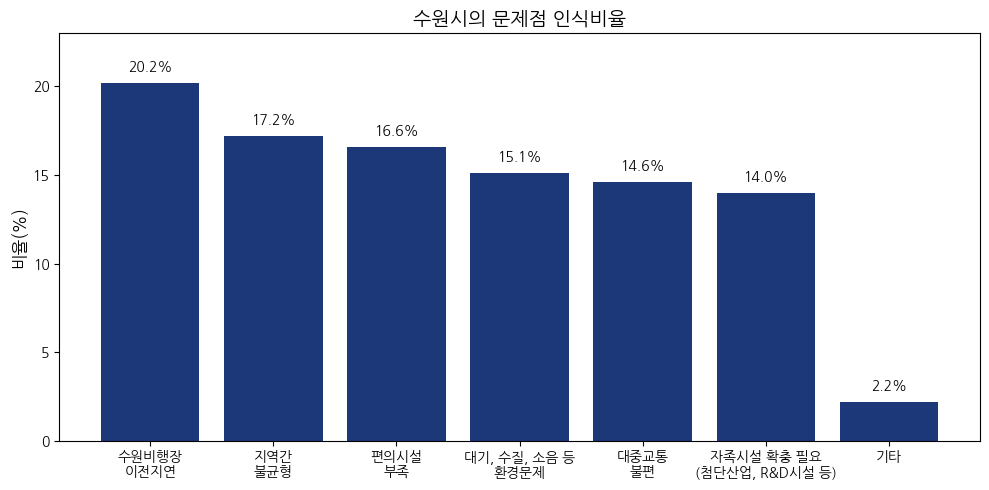

In [34]:
# 시각화
plt.figure(figsize=(10, 5))
bars = plt.bar(labels, df["비율"], color=suwon_blue)

plt.title("수원시의 문제점 인식비율", fontsize=14)
plt.ylabel("비율(%)", fontsize=12)
plt.ylim([0, 23])
plt.xticks(rotation=0, ha='center')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show();

## 2) 향후 수원시의 이상적인 모습

In [35]:
data = {
    "항목": ["산업첨단\n도시", "교육복지\n도시", "환경생태\n도시", "주거중심\n도시",
           "관광휴양\n도시", "교통물류\n도시", "행정법제\n도시", "기타"],
    "비율": [18.7, 17.5, 16.5, 15.3, 14.0, 9.0, 8.7, 0.2]
}

df = pd.DataFrame(data)

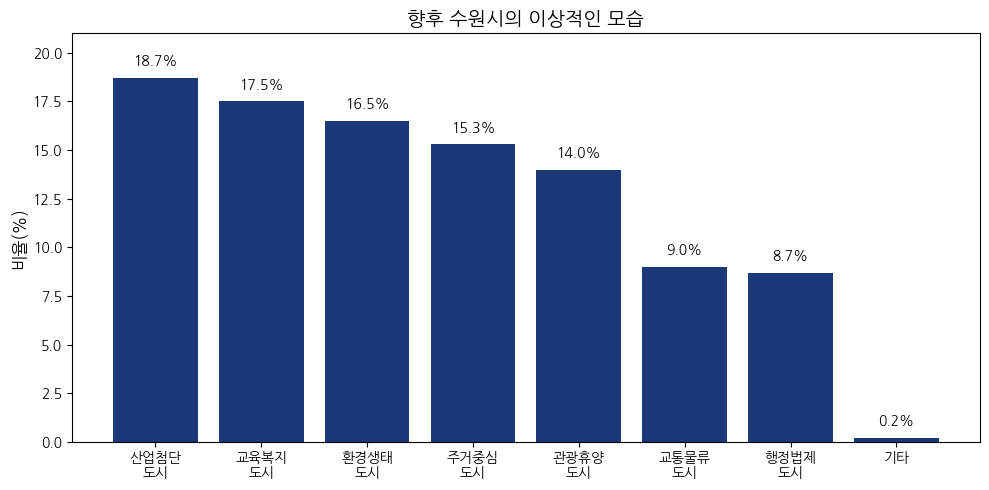

In [36]:
# 시각화
plt.figure(figsize=(10, 5))
bars = plt.bar(df["항목"], df["비율"], color=suwon_blue)

plt.title("향후 수원시의 이상적인 모습", fontsize=14)
plt.ylabel("비율(%)", fontsize=12)
plt.ylim([0, 21])
plt.xticks(rotation=0, ha='center')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show();

## 3)

In [37]:
data = {
    "항목": [
        "삶의 질 향상과\n내실 있는 성장\n(교육, 복지, 여가 등)",
        "주거환경개선 등\n적극적인 \n주거개발 추진",
        "환경과 녹지를 \n고려한 \n지속가능한 개발",
        "첨단산업, 공업지역\n활성화 등 거점중심의\n전략적 개발",
        "지역간\n균형발전\n추구",
        "토지의 효율적인\n활용을 통한\n경쟁력 강화",
        "기타"
    ],
    "비율": [33.6, 21.3, 17.8, 10.8, 8.4, 7.9, 0.3]
}

df = pd.DataFrame(data)


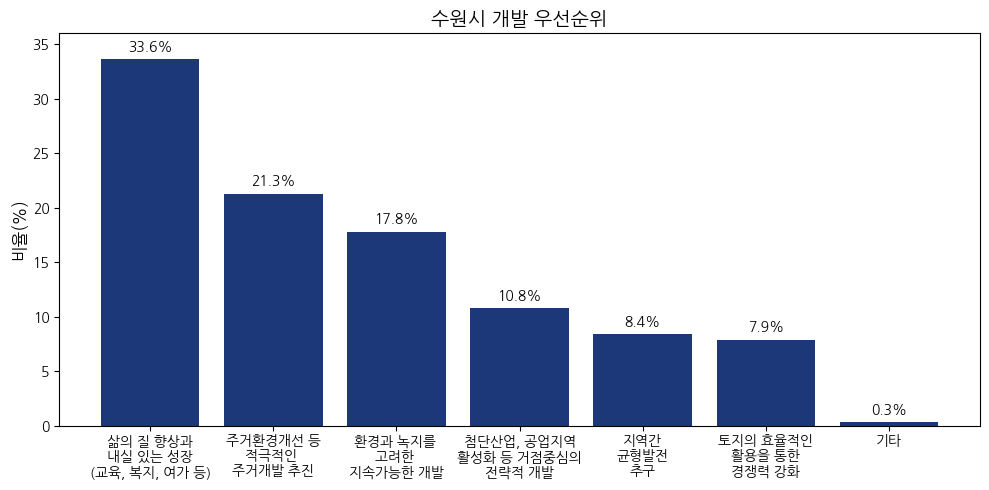

In [38]:
# 시각화
plt.figure(figsize=(10, 5))
bars = plt.bar(df["항목"], df["비율"], color=suwon_blue)

plt.title("수원시 개발 우선순위", fontsize=14)
plt.ylabel("비율(%)", fontsize=12)
plt.ylim([0, 36])
plt.xticks(rotation=0, ha='center')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f"{yval:.1f}%",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show();